In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import time as time
from apriori_python import apriori as apriori_ap
from apyori import apriori as apriori_apy
from efficient_apriori import apriori as apriori_eff
from fpgrowth_py import fpgrowth as fpgrowth_py_fp

warnings.filterwarnings('ignore')

# Задание 1
Загрузить данные Market_Basket_Optimisation.csv.

In [9]:
data = pd.read_csv('Market_Basket_Optimisation.csv.')
data.head()
data

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Задание 2
Визуализировать данные (отразить на гистограммах относительную и
фактическую частоту встречаемости для 20 наиболее популярных товаров).

<AxesSubplot: >

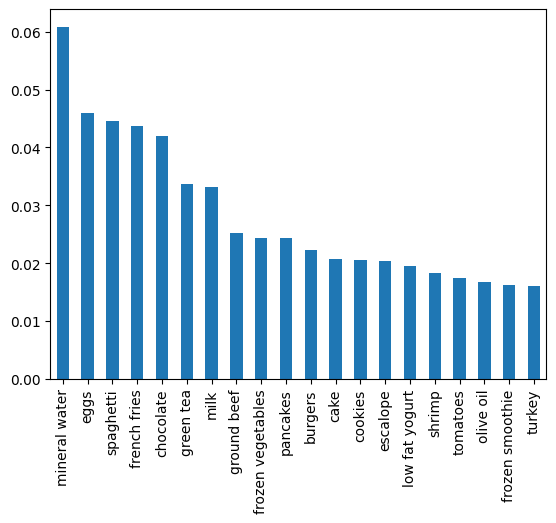

In [10]:
data.stack().value_counts(normalize=True).head(20).plot(kind='bar')

# Задание 3
Применить алгоритм Apriori, используя 3 разные библиотеки
(apriori_python, apyori, efficient_apriori).

In [12]:
transactions = []
for i in range(0, data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

minSupport = 0.02
minConfidence = 0.2

worktimes = []

start = time.time()
itemsets, rules_ap = apriori_ap(transactions, minSup=minSupport, minConf=minConfidence)
worktimes.append(time.time() - start)

start = time.time()
rules_a = apriori_apy(
    transactions,
    min_support=0.02,
    min_confidence=0.2,
    min_lift=1.001,
)
worktimes.append(time.time() - start)

start = time.time()
itemsets, rules_ea = apriori_eff(transactions, min_support=minSupport, min_confidence=minConfidence)
worktimes.append(time.time() - start)

# Задание 4
Применить алгоритм FP-Growth из библиотеки fpgrowth_py.

In [13]:
start = time.time()
itemsets, rules_fp = fpgrowth_py_fp(transactions, minSupRatio=minSupport, minConf=minConfidence)
worktimes.append(time.time() - start)

# Задание 5
Сравнить время выполнения всех алгоритмов и построить гистограмму.

Время работы алгоритма apriori_python:  2.4463107585906982
Время работы алгоритма apyori:  0.0
Время работы алгоритма efficient_apriori:  0.020215988159179688
Время работы алгоритма fpgrowth_py:  0.6057591438293457


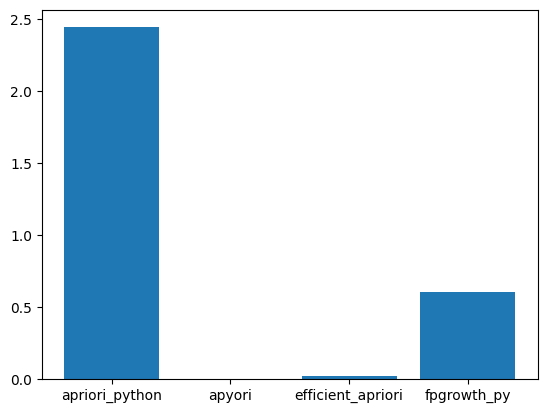

In [14]:
print('Время работы алгоритма apriori_python: ', worktimes[0])
print('Время работы алгоритма apyori: ', worktimes[1])
print('Время работы алгоритма efficient_apriori: ', worktimes[2])
print('Время работы алгоритма fpgrowth_py: ', worktimes[3])

plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth_py'], worktimes)
plt.show()

# Задание 6
Загрузить данные data.csv.

In [16]:
data2 = pd.read_csv('data.csv.')
data2

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9525,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9526,Truffles,Tea,Spanish Brunch,Christmas common,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9527,Muffin,Tacos/Fajita,Coffee,Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9528,Coffee,Pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Задание 7
Визуализировать данные (отразить на гистограммах относительную и
фактическую частоту встречаемости для 20 наиболее популярных товаров).

<AxesSubplot: >

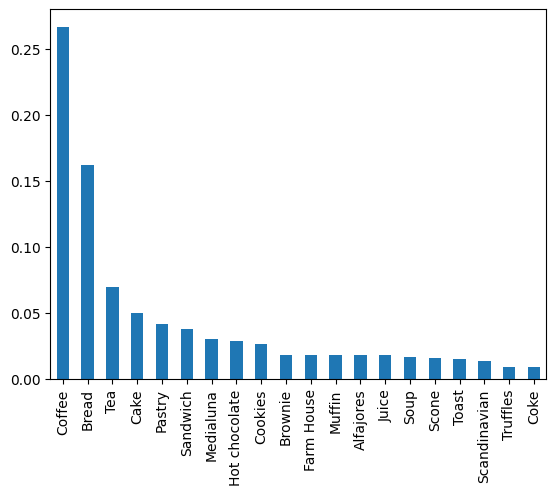

In [17]:
data2.stack().value_counts(normalize=True).head(20).plot(kind='bar')
data2.stack().value_counts(normalize=True).apply(lambda x: x / data.shape[0]).head(20).plot(kind='bar')

# Задание 8
Применить алгоритм Apriori, используя 3 разные библиотеки
(apriori_python, apyori, efficient_apriori).

In [18]:
transactions2 = []
for i in range(0, data2.shape[0]):
    row = data2.iloc[i].dropna().tolist()
    transactions2.append(row)

minSupport2 = 0.02
minConfidence2 = 0.2

worktimes2 = []

start = time.perf_counter()
itemsets2, rules_ap2 = apriori_ap(transactions2, minSup=minSupport2, minConf=minConfidence2)
worktimes2.append(time.perf_counter() - start)

start = time.perf_counter()
rules_a2 = apriori_apy(
    transactions2,
    min_support=minSupport2,
    min_confidence=minConfidence2,
    min_lift=1.001,
)
worktimes2.append(time.perf_counter() - start)

start = time.time()
itemsets2, rules_ea2 = apriori_eff(transactions2, min_support=minSupport2, min_confidence=minConfidence2)
worktimes2.append(time.time() - start)

# Задание 9
Применить алгоритм FP-Growth из библиотеки fpgrowth_py

In [19]:
start = time.time()
itemsets2, rules_fp2 = fpgrowth_py_fp(transactions2, minSupRatio=minSupport2, minConf=minConfidence2)
worktimes2.append(time.time() - start)

# Задание 10
Сравнить время выполнения всех алгоритмов и построить гистограмму.

Время работы алгоритма apriori_python:  0.3727944000002026
Время работы алгоритма apyori:  5.1700000767596066e-05
Время работы алгоритма efficient_apriori:  0.0060002803802490234
Время работы алгоритма fpgrowth_py:  0.30232977867126465


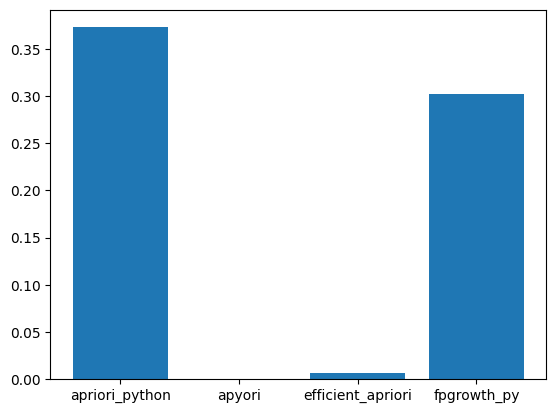

In [20]:
print('Время работы алгоритма apriori_python: ', worktimes2[0])
print('Время работы алгоритма apyori: ', worktimes2[1])
print('Время работы алгоритма efficient_apriori: ', worktimes2[2])
print('Время работы алгоритма fpgrowth_py: ', worktimes2[3])

plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth_py'], worktimes2)
plt.show()